# Regression Using Gradient Tree Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

## Importing Pre-processed Data

In [2]:
df_new = pd.read_pickle(r'C:\Users\nishi\Desktop\EECS 731 - Data Science\Project\df_new.pkl')

In [3]:
df_new.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,trip_duration,month,day,total_custom,weekend_Trip,hour,airport
0,2017-12-31 23:55:09,2017-12-31 23:59:14,1,17,61,1,1.1,5.5,0.5,0.5,...,6.80,2,1.0,4.083333,12,6,6.80,1,23,0
1,2017-12-31 23:30:36,2017-12-31 23:37:20,1,61,49,1,1.1,6.5,0.5,0.5,...,7.80,2,1.0,6.733333,12,6,7.80,1,23,0
2,2017-12-31 23:02:26,2017-12-31 23:19:37,1,228,188,1,4.1,15.5,0.5,0.5,...,20.15,1,1.0,17.183333,12,6,20.15,1,23,0
3,2017-12-31 23:12:24,2017-12-31 23:16:55,1,228,26,1,0.8,5.0,0.5,0.5,...,6.30,2,1.0,4.516667,12,6,6.30,1,23,0
4,2017-12-31 23:53:11,2017-12-31 23:55:40,1,225,225,1,0.5,4.0,0.5,0.5,...,5.30,2,1.0,2.483333,12,6,5.30,1,23,0


## Shuffling data

In [4]:
df_new = df_new.sample(frac=1).reset_index(drop=True)

## Different Models with different features for accuracy comparasion

In [5]:
# Creating a dataframes for model testing. Models cannot parse datetime columns, so have to drop them

# Models with trip_distance & trip_duration
df_1 = df_new[['trip_distance','trip_duration','fare_amount']]
df_2 = df_new[['trip_distance','trip_duration','airport','fare_amount']]
df_3 = df_new[['trip_distance','trip_duration','airport','RatecodeID','fare_amount']]
df_4 = df_new[['trip_distance','trip_duration','airport','RatecodeID','payment_type','fare_amount']]
df_5 = df_new[['trip_distance','trip_duration','airport','RatecodeID','payment_type','DOLocationID','fare_amount']]
df_6 = df_new[['trip_distance','trip_duration','airport','RatecodeID','payment_type','DOLocationID','trip_type','fare_amount']]
df_7 = df_new[['trip_distance','trip_duration','airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','fare_amount']]
df_8 = df_new[['trip_distance','trip_duration','airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','fare_amount']]

# Models without trip_distance & trip_duration

df_9 = df_new[['airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','fare_amount']]
df_10 = df_new[['airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','fare_amount']]
df_11 = df_new[['airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','fare_amount']]
df_12 = df_new[['airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','weekend_Trip','fare_amount']]
df_13 = df_new[['airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','weekend_Trip','month','fare_amount']]

# Models with only trip_distance

df_14 = df_new[['trip_distance','airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','fare_amount']]
df_15 = df_new[['trip_distance','airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','fare_amount']]
df_16 = df_new[['trip_distance','airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','fare_amount']]
df_17 = df_new[['trip_distance','airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','weekend_Trip','fare_amount']]
df_18 = df_new[['trip_distance','airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','weekend_Trip','month','fare_amount']]


## Splitting the data into Training and Testing

In [6]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split


#for i in arange(0,18):
#    eval('features_' + str(i)) = eval('df_' + str(i)).drop(['fare_amount'], axis = 1)
#    eval('labels_' + str(i)) = eval('df_' + str(i))[['fare_amount']]
    
features_1 = df_1.drop(['fare_amount'], axis = 1)
labels_1 = df_1[['fare_amount']]

features_2 = df_2.drop(['fare_amount'], axis = 1)
labels_2 = df_2[['fare_amount']]

features_3 = df_3.drop(['fare_amount'], axis = 1)
labels_3 = df_3[['fare_amount']]

features_4 = df_4.drop(['fare_amount'], axis = 1)
labels_4 = df_4[['fare_amount']]

features_5 = df_5.drop(['fare_amount'], axis = 1)
labels_5 = df_5[['fare_amount']]

features_6 = df_6.drop(['fare_amount'], axis = 1)
labels_6 = df_6[['fare_amount']]

features_7 = df_7.drop(['fare_amount'], axis = 1)
labels_7 = df_7[['fare_amount']]

features_8 = df_8.drop(['fare_amount'], axis = 1)
labels_8 = df_8[['fare_amount']]

features_9 = df_9.drop(['fare_amount'], axis = 1)
labels_9 = df_9[['fare_amount']]

features_10 = df_10.drop(['fare_amount'], axis = 1)
labels_10 = df_10[['fare_amount']]

features_11 = df_11.drop(['fare_amount'], axis = 1)
labels_11 = df_11[['fare_amount']]

features_12 = df_12.drop(['fare_amount'], axis = 1)
labels_12 = df_12[['fare_amount']]

features_13 = df_13.drop(['fare_amount'], axis = 1)
labels_13 = df_13[['fare_amount']]

features_14 = df_14.drop(['fare_amount'], axis = 1)
labels_14 = df_14[['fare_amount']]

features_15 = df_15.drop(['fare_amount'], axis = 1)
labels_15 = df_15[['fare_amount']]

features_16 = df_16.drop(['fare_amount'], axis = 1)
labels_16 = df_16[['fare_amount']]

features_17 = df_17.drop(['fare_amount'], axis = 1)
labels_17 = df_17[['fare_amount']]

features_18 = df_18.drop(['fare_amount'], axis = 1)
labels_18 = df_18[['fare_amount']]

In [7]:
# Split the data into training and testing sets

train_features_1, test_features_1, train_labels_1, test_labels_1 = train_test_split(features_1, labels_1, test_size = 0.10, random_state = 42)
train_features_2, test_features_2, train_labels_2, test_labels_2 = train_test_split(features_2, labels_2, test_size = 0.10, random_state = 42)
train_features_3, test_features_3, train_labels_3, test_labels_3 = train_test_split(features_3, labels_3, test_size = 0.10, random_state = 42)
train_features_4, test_features_4, train_labels_4, test_labels_4 = train_test_split(features_4, labels_4, test_size = 0.10, random_state = 42)
train_features_5, test_features_5, train_labels_5, test_labels_5 = train_test_split(features_5, labels_5, test_size = 0.10, random_state = 42)
train_features_6, test_features_6, train_labels_6, test_labels_6 = train_test_split(features_6, labels_6, test_size = 0.10, random_state = 42)
train_features_7, test_features_7, train_labels_7, test_labels_7 = train_test_split(features_7, labels_7, test_size = 0.10, random_state = 42)
train_features_8, test_features_8, train_labels_8, test_labels_8 = train_test_split(features_8, labels_8, test_size = 0.10, random_state = 42)
train_features_9, test_features_9, train_labels_9, test_labels_9 = train_test_split(features_9, labels_9, test_size = 0.10, random_state = 42)
train_features_10, test_features_10, train_labels_10, test_labels_10 = train_test_split(features_10, labels_10, test_size = 0.10, random_state = 42)
train_features_11, test_features_11, train_labels_11, test_labels_11 = train_test_split(features_11, labels_11, test_size = 0.10, random_state = 42)
train_features_12, test_features_12, train_labels_12, test_labels_12 = train_test_split(features_12, labels_12, test_size = 0.10, random_state = 42)
train_features_13, test_features_13, train_labels_13, test_labels_13 = train_test_split(features_13, labels_13, test_size = 0.10, random_state = 42)
train_features_14, test_features_14, train_labels_14, test_labels_14 = train_test_split(features_14, labels_14, test_size = 0.10, random_state = 42)
train_features_15, test_features_15, train_labels_15, test_labels_15 = train_test_split(features_15, labels_15, test_size = 0.10, random_state = 42)
train_features_16, test_features_16, train_labels_16, test_labels_16 = train_test_split(features_16, labels_16, test_size = 0.10, random_state = 42)
train_features_17, test_features_17, train_labels_17, test_labels_17 = train_test_split(features_17, labels_17, test_size = 0.10, random_state = 42)
train_features_18, test_features_18, train_labels_18, test_labels_18 = train_test_split(features_18, labels_18, test_size = 0.10, random_state = 42)

In [8]:
print('Training Features Shape:', train_features_1.shape)
print('Training Labels Shape:', train_labels_1.shape)
print('Testing Features Shape:', test_features_1.shape)
print('Testing Labels Shape:', test_labels_1.shape)

Training Features Shape: (2024739, 2)
Training Labels Shape: (2024739, 1)
Testing Features Shape: (224972, 2)
Testing Labels Shape: (224972, 1)


# Using Gradient Tree Boosting for prediction

In [9]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
rf1 = GradientBoostingRegressor()
rf2 = GradientBoostingRegressor()
rf3 = GradientBoostingRegressor()
rf4 = GradientBoostingRegressor()
rf5 = GradientBoostingRegressor()
rf6 = GradientBoostingRegressor()
rf7 = GradientBoostingRegressor()
rf8 = GradientBoostingRegressor()
rf9 = GradientBoostingRegressor()
rf10 = GradientBoostingRegressor()
rf11 = GradientBoostingRegressor()
rf12 = GradientBoostingRegressor()
rf13 = GradientBoostingRegressor()
rf14 = GradientBoostingRegressor()
rf15 = GradientBoostingRegressor()
rf16 = GradientBoostingRegressor()
rf17 = GradientBoostingRegressor()
rf18 = GradientBoostingRegressor()

rf1.fit(train_features_1, train_labels_1.values.ravel())
rf2.fit(train_features_2, train_labels_2.values.ravel())
rf3.fit(train_features_3, train_labels_3.values.ravel())
rf4.fit(train_features_4, train_labels_4.values.ravel())
rf5.fit(train_features_5, train_labels_5.values.ravel())
rf6.fit(train_features_6, train_labels_6.values.ravel())
rf7.fit(train_features_7, train_labels_7.values.ravel())
rf8.fit(train_features_8, train_labels_8.values.ravel())
rf9.fit(train_features_9, train_labels_9.values.ravel())
rf10.fit(train_features_10, train_labels_10.values.ravel())
rf11.fit(train_features_11, train_labels_11.values.ravel())
rf12.fit(train_features_12, train_labels_12.values.ravel())
rf13.fit(train_features_13, train_labels_13.values.ravel())
rf14.fit(train_features_14, train_labels_14.values.ravel())
rf15.fit(train_features_15, train_labels_15.values.ravel())
rf16.fit(train_features_16, train_labels_16.values.ravel())
rf17.fit(train_features_17, train_labels_17.values.ravel())
rf18.fit(train_features_18, train_labels_18.values.ravel())

Wall time: 52min 47s


# Predicting from Input

In [10]:
prediction_1 = rf1.predict(test_features_1)
prediction_2 = rf2.predict(test_features_2)
prediction_3 = rf3.predict(test_features_3)
prediction_4 = rf4.predict(test_features_4)
prediction_5 = rf5.predict(test_features_5)
prediction_6 = rf6.predict(test_features_6)
prediction_7 = rf7.predict(test_features_7)
prediction_8 = rf8.predict(test_features_8)
prediction_9 = rf9.predict(test_features_9)
prediction_10 = rf10.predict(test_features_10)
prediction_11 = rf11.predict(test_features_11)
prediction_12 = rf12.predict(test_features_12)
prediction_13 = rf13.predict(test_features_13)
prediction_14 = rf14.predict(test_features_14)
prediction_15 = rf15.predict(test_features_15)
prediction_16 = rf16.predict(test_features_16)
prediction_17 = rf17.predict(test_features_17)
prediction_18 = rf18.predict(test_features_18)

In [11]:
result_1 = test_features_1
result_2 = test_features_2
result_3 = test_features_3
result_4 = test_features_4
result_5 = test_features_5
result_6 = test_features_6
result_7 = test_features_7
result_8 = test_features_8
result_9 = test_features_9
result_10 = test_features_10
result_11 = test_features_11
result_12 = test_features_12
result_13 = test_features_13
result_14 = test_features_14
result_15 = test_features_15
result_16 = test_features_16
result_17 = test_features_17
result_18 = test_features_18

## Creating Results

In [12]:
result_1['actual_fare'] = test_labels_1[['fare_amount']]
result_2['actual_fare'] = test_labels_2[['fare_amount']]
result_3['actual_fare'] = test_labels_3[['fare_amount']]
result_4['actual_fare'] = test_labels_4[['fare_amount']]
result_5['actual_fare'] = test_labels_5[['fare_amount']]
result_6['actual_fare'] = test_labels_6[['fare_amount']]
result_7['actual_fare'] = test_labels_7[['fare_amount']]
result_8['actual_fare'] = test_labels_8[['fare_amount']]
result_9['actual_fare'] = test_labels_9[['fare_amount']]
result_10['actual_fare'] = test_labels_10[['fare_amount']]
result_11['actual_fare'] = test_labels_11[['fare_amount']]
result_12['actual_fare'] = test_labels_12[['fare_amount']]
result_13['actual_fare'] = test_labels_13[['fare_amount']]
result_14['actual_fare'] = test_labels_14[['fare_amount']]
result_15['actual_fare'] = test_labels_15[['fare_amount']]
result_16['actual_fare'] = test_labels_16[['fare_amount']]
result_17['actual_fare'] = test_labels_17[['fare_amount']]
result_18['actual_fare'] = test_labels_18[['fare_amount']]


result_1['predicted_fare'] = prediction_1
result_2['predicted_fare'] = prediction_2
result_3['predicted_fare'] = prediction_3
result_4['predicted_fare'] = prediction_4
result_5['predicted_fare'] = prediction_5
result_6['predicted_fare'] = prediction_6
result_7['predicted_fare'] = prediction_7
result_8['predicted_fare'] = prediction_8
result_9['predicted_fare'] = prediction_9
result_10['predicted_fare'] = prediction_10
result_11['predicted_fare'] = prediction_11
result_12['predicted_fare'] = prediction_12
result_13['predicted_fare'] = prediction_13
result_14['predicted_fare'] = prediction_14
result_15['predicted_fare'] = prediction_15
result_16['predicted_fare'] = prediction_16
result_17['predicted_fare'] = prediction_17
result_18['predicted_fare'] = prediction_18

result_1['difference'] = abs(result_1['predicted_fare']-result_1['actual_fare'])
result_2['difference'] = abs(result_2['predicted_fare']-result_2['actual_fare'])
result_3['difference'] = abs(result_3['predicted_fare']-result_3['actual_fare'])
result_4['difference'] = abs(result_4['predicted_fare']-result_4['actual_fare'])
result_5['difference'] = abs(result_5['predicted_fare']-result_5['actual_fare'])
result_6['difference'] = abs(result_6['predicted_fare']-result_6['actual_fare'])
result_7['difference'] = abs(result_7['predicted_fare']-result_7['actual_fare'])
result_8['difference'] = abs(result_8['predicted_fare']-result_8['actual_fare'])
result_9['difference'] = abs(result_9['predicted_fare']-result_9['actual_fare'])
result_10['difference'] = abs(result_10['predicted_fare']-result_10['actual_fare'])
result_11['difference'] = abs(result_11['predicted_fare']-result_11['actual_fare'])
result_12['difference'] = abs(result_12['predicted_fare']-result_12['actual_fare'])
result_13['difference'] = abs(result_13['predicted_fare']-result_13['actual_fare'])
result_14['difference'] = abs(result_14['predicted_fare']-result_14['actual_fare'])
result_15['difference'] = abs(result_15['predicted_fare']-result_15['actual_fare'])
result_16['difference'] = abs(result_16['predicted_fare']-result_16['actual_fare'])
result_17['difference'] = abs(result_17['predicted_fare']-result_17['actual_fare'])
result_18['difference'] = abs(result_18['predicted_fare']-result_18['actual_fare'])

## Models Accuracy

### Models with both trip_distance & trip_duration
Model_1 = {'trip_distance','trip_duration','fare_amount'}  
Model_2 = {'trip_distance','trip_duration','airport','fare_amount'}  
Model_3 = {'trip_distance','trip_duration','airport','RatecodeID','fare_amount'}  
Model_4 = {'trip_distance','trip_duration','airport','RatecodeID','payment_type','fare_amount'}  
Model_5 = {'trip_distance','trip_duration','airport','RatecodeID','payment_type','DOLocationID','fare_amount'}  
Model_6 = {'trip_distance','trip_duration','airport','RatecodeID','payment_type','DOLocationID','trip_type','fare_amount'}  
Model_7 = {'trip_distance','trip_duration','airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','fare_amount'}  
Model_8 = {'trip_distance','trip_duration','airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','fare_amount'}  

In [13]:
print("Model_1 Accuracy % : " +str((result_1[result_1['difference'] < 1].shape[0]/result_1.shape[0]) * 100)[:5])
print("Model_2 Accuracy % : " +str((result_2[result_2['difference'] < 1].shape[0]/result_2.shape[0]) * 100)[:5])
print("Model_3 Accuracy % : " +str((result_3[result_3['difference'] < 1].shape[0]/result_3.shape[0]) * 100)[:5])
print("Model_4 Accuracy % : " +str((result_4[result_4['difference'] < 1].shape[0]/result_4.shape[0]) * 100)[:5])
print("Model_5 Accuracy % : " +str((result_5[result_5['difference'] < 1].shape[0]/result_5.shape[0]) * 100)[:5])
print("Model_6 Accuracy % : " +str((result_6[result_6['difference'] < 1].shape[0]/result_6.shape[0]) * 100)[:5])
print("Model_7 Accuracy % : " +str((result_7[result_7['difference'] < 1].shape[0]/result_7.shape[0]) * 100)[:5])
print("Model_8 Accuracy % : " +str((result_8[result_8['difference'] < 1].shape[0]/result_8.shape[0]) * 100)[:5])

Model_1 Accuracy % : 93.10
Model_2 Accuracy % : 93.10
Model_3 Accuracy % : 93.56
Model_4 Accuracy % : 93.53
Model_5 Accuracy % : 93.53
Model_6 Accuracy % : 93.52
Model_7 Accuracy % : 93.52
Model_8 Accuracy % : 93.49


### Models with only trip_distance

Model_14 = {'airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','fare_amount'}  
Model_15 = {'airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','fare_amount'}  
Model_16 = {'airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','fare_amount'}  
Model_17 = {'airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','weekend_Trip','fare_amount'}  
Model_18 = {'airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','weekend_Trip','month','fare_amount'}  

In [16]:
print("Model_14 Accuracy % : " +str((result_14[result_14['difference'] < 1].shape[0]/result_14.shape[0]) * 100)[:5])
print("Model_15 Accuracy % : " +str((result_15[result_15['difference'] < 1].shape[0]/result_15.shape[0]) * 100)[:5])
print("Model_16 Accuracy % : " +str((result_16[result_16['difference'] < 1].shape[0]/result_16.shape[0]) * 100)[:5])
print("Model_17 Accuracy % : " +str((result_17[result_17['difference'] < 1].shape[0]/result_17.shape[0]) * 100)[:5])
print("Model_18 Accuracy % : " +str((result_18[result_18['difference'] < 1].shape[0]/result_18.shape[0]) * 100)[:5])

Model_14 Accuracy % : 58.86
Model_15 Accuracy % : 61.75
Model_16 Accuracy % : 62.06
Model_17 Accuracy % : 62.06
Model_18 Accuracy % : 62.06


### Models without trip_distance & trip_duration

Model_9 = {'airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','fare_amount'}  
Model_10 = {'airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','fare_amount'}  
Model_11 = {'airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','fare_amount'}  
Model_12 = {'airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','weekend_Trip','fare_amount'}  
Model_13 = {'airport','RatecodeID','payment_type','DOLocationID','trip_type','passenger_count','PULocationID','hour','day','weekend_Trip','month','fare_amount'}  

In [17]:
print("Model_9 Accuracy % : " +str((result_9[result_9['difference'] < 1].shape[0]/result_9.shape[0]) * 100)[:5])
print("Model_10 Accuracy % : " +str((result_10[result_10['difference'] < 1].shape[0]/result_10.shape[0]) * 100)[:5])
print("Model_11 Accuracy % : " +str((result_11[result_11['difference'] < 1].shape[0]/result_11.shape[0]) * 100)[:5])
print("Model_12 Accuracy % : " +str((result_12[result_12['difference'] < 1].shape[0]/result_12.shape[0]) * 100)[:5])
print("Model_13 Accuracy % : " +str((result_13[result_13['difference'] < 1].shape[0]/result_13.shape[0]) * 100)[:5])

Model_9 Accuracy % : 13.53
Model_10 Accuracy % : 13.49
Model_11 Accuracy % : 13.58
Model_12 Accuracy % : 13.58
Model_13 Accuracy % : 13.77


In [18]:
d = pd.DataFrame(columns=['Models','Accuracy'])
d['Models'] = ['Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5', 'Model_6', 'Model_7', 'Model_8', 'Model_9', 'Model_10', 'Model_11', 'Model_12', 'Model_13', 'Model_14', 'Model_15', 'Model_16', 'Model_17', 'Model_18']
d['Accuracy'].loc[[0]] = ((result_1[result_1['difference'] < 1].shape[0]/result_1.shape[0]) * 100)
d['Accuracy'].loc[[1]] = ((result_2[result_2['difference'] < 1].shape[0]/result_2.shape[0]) * 100)
d['Accuracy'].loc[[2]] = ((result_3[result_3['difference'] < 1].shape[0]/result_3.shape[0]) * 100)
d['Accuracy'].loc[[3]] = ((result_4[result_4['difference'] < 1].shape[0]/result_4.shape[0]) * 100)
d['Accuracy'].loc[[4]] = ((result_5[result_5['difference'] < 1].shape[0]/result_5.shape[0]) * 100)
d['Accuracy'].loc[[5]] = ((result_6[result_6['difference'] < 1].shape[0]/result_6.shape[0]) * 100)
d['Accuracy'].loc[[6]] = ((result_7[result_7['difference'] < 1].shape[0]/result_7.shape[0]) * 100)
d['Accuracy'].loc[[7]] = ((result_8[result_8['difference'] < 1].shape[0]/result_8.shape[0]) * 100)
d['Accuracy'].loc[[8]] = ((result_9[result_9['difference'] < 1].shape[0]/result_9.shape[0]) * 100)
d['Accuracy'].loc[[9]] = ((result_10[result_10['difference'] < 1].shape[0]/result_10.shape[0]) * 100)
d['Accuracy'].loc[[10]] = ((result_11[result_11['difference'] < 1].shape[0]/result_11.shape[0]) * 100)
d['Accuracy'].loc[[11]] = ((result_12[result_12['difference'] < 1].shape[0]/result_12.shape[0]) * 100)
d['Accuracy'].loc[[12]] = ((result_13[result_13['difference'] < 1].shape[0]/result_13.shape[0]) * 100)
d['Accuracy'].loc[[13]] = ((result_14[result_14['difference'] < 1].shape[0]/result_14.shape[0]) * 100)
d['Accuracy'].loc[[14]] = ((result_15[result_15['difference'] < 1].shape[0]/result_15.shape[0]) * 100)
d['Accuracy'].loc[[15]] = ((result_16[result_16['difference'] < 1].shape[0]/result_16.shape[0]) * 100)
d['Accuracy'].loc[[16]] = ((result_17[result_17['difference'] < 1].shape[0]/result_17.shape[0]) * 100)
d['Accuracy'].loc[[17]] = ((result_18[result_18['difference'] < 1].shape[0]/result_18.shape[0]) * 100)

# Results

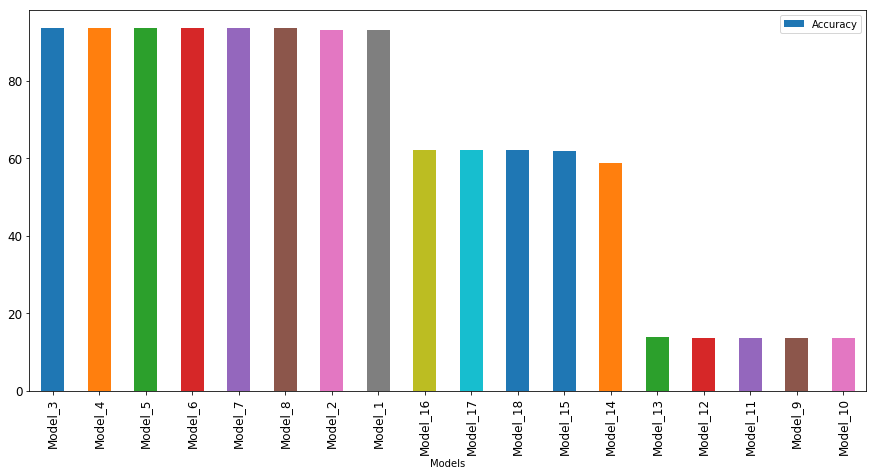

In [19]:
d.sort_values(by=['Accuracy'], ascending=False).plot.bar(x='Models', y='Accuracy',figsize=(15,7), fontsize=12)